In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 2698 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 450 images belonging to 6 classes.


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 5s 0us/step


In [5]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [9]:
x = mobile.layers[-6].output
output = Dense(units=6, activation='softmax')(x)

In [10]:
model = Model(inputs=mobile.input, outputs=output)

In [11]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [13]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
270/270 - 114s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0197 - val_accuracy: 0.9933
Epoch 2/30
270/270 - 111s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9933
Epoch 3/30
270/270 - 113s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0211 - val_accuracy: 0.9917
Epoch 4/30
270/270 - 114s - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.1539 - val_accuracy: 0.9450
Epoch 5/30
270/270 - 114s - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.0307 - val_accuracy: 0.9867
Epoch 6/30
270/270 - 114s - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.0246 - val_accuracy: 0.9917
Epoch 7/30
270/270 - 114s - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.2011 - val_accuracy: 0.9450
Epoch 8/30
270/270 - 115s - loss: 0.0064 - accuracy: 0.9970 - val_loss: 0.0548 - val_accuracy: 0.9817
Epoch 9/30
270/270 - 115s - loss: 0.0053 - accuracy: 0.9974 - val_loss: 0.0695 - val_accuracy: 0.9783
Epoch 10/30
270/270 - 115s - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.0250 - 

In [35]:
result = model.evaluate_generator(valid_batches, 50)
print('Accuracy of this model is: ', result[1])

c:\users\mohit\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy of this model is:  0.9940000176429749


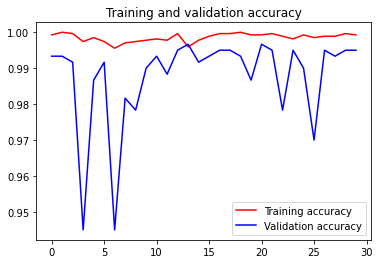

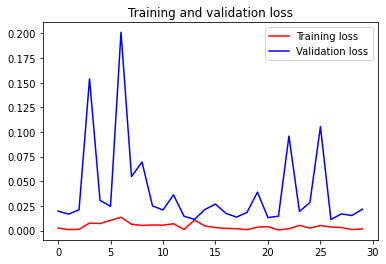

<Figure size 432x288 with 0 Axes>

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot  ( epochs,   loss,'r', label='Training loss' )
plt.plot  ( epochs, val_loss,'b', label='Validation loss' )
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()

plt.show()

In [27]:
test_labels = test_batches.classes

In [28]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [29]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
test_batches.class_indices

{'freshapples': 0,
 'freshbananas': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbananas': 4,
 'rottenoranges': 5}

Confusion matrix, without normalization
[[75  0  0  0  0  0]
 [ 0 75  0  0  0  0]
 [ 0  0 75  0  0  0]
 [ 0  0  0 75  0  0]
 [ 0  0  0  0 75  0]
 [ 0  0  0  1  0 74]]


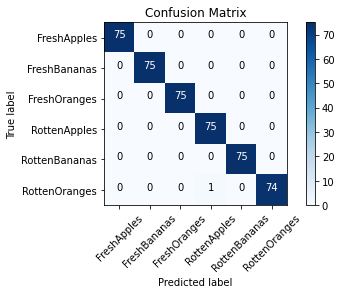

In [32]:
cm_plot_labels = ['FreshApples','FreshBananas','FreshOranges','RottenApples','RottenBananas','RottenOranges']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')